<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Logparser/blob/master/data_augmentation_with_python_chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 7

## 🌻 Welcome to Chapter 7, "audio Augmentation"


This chapter will cover Audio augmentation using Waveform transformation, and in particular, the following topics:   

- Standard audio augmentation techniques 

- Filters 

- Audio augmentation libraries 

- Real-world audio datasets  

- Reinforce learning through Python code (the following code)

- ✋ STOP: You must set up Kaggle username and app Key in below step.

# Load Notebook


- This Notebook original link is: 
  - https://github.com/PacktPublishing/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_7.ipynb

# GitHub Clone

In [ ]:
# git version should be 2.17.1 or higher
!git --version

git version 2.25.1


In [ ]:
url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
# url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

fatal: destination path 'Data-Augmentation-with-Python' already exists and is not an empty directory.


## Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [ ]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [ ]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

# Run Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [ ]:
# %% CARRY-OVER code install

!pip install opendatasets --upgrade
!pip install pyspellchecker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


## Verify Pluto

In [ ]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2023/03/23 11:22
                    Platform : linux
     Pluto Version (Chapter) : 2.0
             Python (3.7.10) : actual: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
            PyTorch (1.11.0) : actual: 1.13.1+cu116
              Pandas (1.3.5) : actual: 1.4.4
                 PIL (9.0.0) : actual: 8.4.0
          Matplotlib (3.2.2) : actual: 3.7.1
                   CPU count : 2
                   CPU speed : 2.20 GHz
               CPU max speed : 0.00 GHz
---------------------------- : ----------------------------


## (Optional) Export to .py

In [ ]:
pluto_chapter_7 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_7.py'
!cp {pluto_file} {pluto_chapter_7}

# ✋ Set up Kaggle username and app Key

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.

- STOP: Update your Kaggle access username or key first.

In [ ]:
# %%CARRY-OVER code 

# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("YOUR-USERNAME", "YOUR-KEY")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Required version 0.7+ 0.7.1


# Fetch Kaggle Data

## Musical Emotions Classification

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/kingofarmy/musical-emotions-classification'
pluto.fetch_kaggle_dataset(url)

Skipping, found downloaded files in "kaggle/musical-emotions-classification" (use force=True to force download)
CPU times: user 2.71 ms, sys: 0 ns, total: 2.71 ms
Wall time: 8.45 ms


In [ ]:
f = 'kaggle/musical-emotions-classification/Train.csv'
pluto.df_music_data = pluto.fetch_df(f)
pluto.df_music_data.head(3)

,GroupID,ImageID,Target,Shapes
0,Happy102,Happy10200.wav,Happy,220608
1,Happy102,Happy10201.wav,Happy,220608
2,Happy102,Happy10202.wav,Happy,220608


In [ ]:
# # /content/kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/Happy/Happy10200.wav
# # remove white space in directory and filename
# # run this until no error/output
# f = 'kaggle/sea-animals-image-dataste'
# #!find {f} -name "* *" -type d | rename 's/ /_/g'
# !find {f} -name "* *" -type f | rename 's/ /_/g'

In [ ]:
# %%writefile -a {pluto_chapter_7}

pluto.version = 7.0
# augment full path
@add_method(PacktDataAug)
def _append_music_full_path(self,x):
  y = re.findall('([a-zA-Z ]*)\d*.*', x)[0]
  return (f'kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/{y}/{x}')
#
@add_method(PacktDataAug)
def fetch_music_full_path(self, df):
  df['fname'] = df.ImageID.apply(self._append_music_full_path)
  return df

In [ ]:
pluto.fetch_music_full_path(pluto.df_music_data)
pluto.df_music_data.head(3)

,GroupID,ImageID,Target,Shapes,fname
0,Happy102,Happy10200.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...
1,Happy102,Happy10201.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...
2,Happy102,Happy10202.wav,Happy,220608,kaggle/musical-emotions-classification/Audio_F...


## Human Speech

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/ejlok1/cremad'
pluto.fetch_kaggle_dataset(url)

Skipping, found downloaded files in "kaggle/cremad" (use force=True to force download)
CPU times: user 1.48 ms, sys: 107 µs, total: 1.59 ms
Wall time: 1.66 ms


In [ ]:
# /content/kaggle/cremad/AudioWAV/1001_DFA_ANG_XX.wav
# change method name to make_dir_dframe
f = 'kaggle/cremad/AudioWAV'
pluto.df_voice_data = pluto.make_dir_dataframe(f)
pluto.df_voice_data.head(3)

/content/Data-Augmentation-with-Python/pluto/pluto_chapter_2.py:199: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)


,fname,label
0,kaggle/cremad/AudioWAV/1005_TIE_HAP_XX.wav,AudioWAV
1,kaggle/cremad/AudioWAV/1047_IWW_FEA_XX.wav,AudioWAV
2,kaggle/cremad/AudioWAV/1066_TSI_NEU_XX.wav,AudioWAV


In [ ]:
pluto.df_voice_data.head(3)

,fname,label
0,kaggle/cremad/AudioWAV/1005_TIE_HAP_XX.wav,AudioWAV
1,kaggle/cremad/AudioWAV/1047_IWW_FEA_XX.wav,AudioWAV
2,kaggle/cremad/AudioWAV/1066_TSI_NEU_XX.wav,AudioWAV


## Urban sound

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/rupakroy/urban-sound-8k'
pluto.fetch_kaggle_dataset(url)

Skipping, found downloaded files in "kaggle/urban-sound-8k" (use force=True to force download)
CPU times: user 1.66 ms, sys: 851 µs, total: 2.51 ms
Wall time: 2.62 ms


In [ ]:
# /content/kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio/fold1
# change method name to make_dir_dframe
f = 'kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio'
pluto.df_sound_data = pluto.make_dir_dataframe(f)
pluto.df_sound_data.head(3)

/content/Data-Augmentation-with-Python/pluto/pluto_chapter_2.py:199: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)


,fname,label
0,kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...,fold1
1,kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...,fold1
2,kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...,fold1


# View and Listen

In [ ]:
# %%writefile -a {pluto_chapter_7}

import IPython
import IPython.display
import librosa
import librosa.display
import matplotlib
import pandas
import numpy
import re

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def _draw_area_with_neg(self,ndata,pic,tcolor='#007bff',bcolor='#ffc107',alpha=0.75,istart=0,izero=0):
  nlen = len(ndata)
  i = numpy.arange(istart, istart+nlen)
  xzero = numpy.zeros(nlen)
  xzero += izero
  # plot line
  pic.plot(i,ndata, linewidth=0.0)  # invisible line for shading
  pic.plot(i,xzero,color='gray',linewidth=0.5) # base line

  # fill top/positive section
  pic.fill_between(
    i, xzero, ndata, where=(ndata >= xzero), 
    interpolate=True, color=tcolor, alpha=alpha, 
    label="Positive"
  )
  # fill bottom/negative section
  pic.fill_between(
    i, xzero, ndata, where=(ndata < xzero), 
    interpolate=True, color=bcolor, alpha=alpha, 
    label="Negative"
  )
  return
#
@add_method(PacktDataAug)
def _fetch_audio_data(self,lname):
  # select random record
  # samp = df.sample(xsize)
  # samp.reset_index(drop=True, inplace=True)
  data_amp, sam_rate = librosa.load(lname, mono=True)
  fname = re.findall('[^\/]+$', lname)
  return data_amp, sam_rate, fname[0]
#
@add_method(PacktDataAug)
def _draw_audio(self,data_amp, sam_rate, fname):
  # define constant
  zlen = 100
  nrow = 2
  ncol = 1
  w = 11
  h = 6
  title = ['', 'Zoom In: From Mid-point to 100+']
  ylabel = ['Waveform Amplitude']
  #
  # define graph
  canvas, pic = matplotlib.pyplot.subplots(nrow, ncol, figsize=(w, h))
  pics = pic.flatten()
  # draw original
  dlen = len(data_amp)
  self._draw_area_with_neg(data_amp,pic[0])
  pics[0].set_title(f'{title[0]} {fname}', fontsize=18.)
  pics[0].set_xlabel(f'Second: Total {dlen/sam_rate:.2f} sec., Sampling Rate: {sam_rate/1000:.2f} kHz', fontsize=16.)
  pics[0].set_ylabel(ylabel[0])
  #
  # overide tick with time
  loc = numpy.array(pics[0].get_xticks())
  b = loc / sam_rate
  b = numpy.round(b,1)
  pics[0].set_xticklabels(b)
  pics[0].grid()
  #
  # draw zoom
  mid = int(len(data_amp) / 2)
  end = mid + zlen
  self._draw_area_with_neg(data_amp[mid:end],pic[1])
  pics[1].set_title(title[1],fontsize=18.)
  pics[1].set_xlabel(f'Time Series Index: Mid-point at {mid/sam_rate:.2f} sec. ({mid} ts)', fontsize=16.)
  pics[1].set_ylabel(ylabel[0])
  pics[1].grid()
  # 
  # display and save image
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  # 
  return 
#
@add_method(PacktDataAug)
def draw_audio(self,df):
  samp = df.sample(1)
  samp.reset_index(drop=True, inplace=True)
  data_amp, sam_rate, fname = self._fetch_audio_data(samp.fname[0])
  self._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
  # display audio 
  display(IPython.display.Audio(data_amp,rate=sam_rate))
  return
#

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

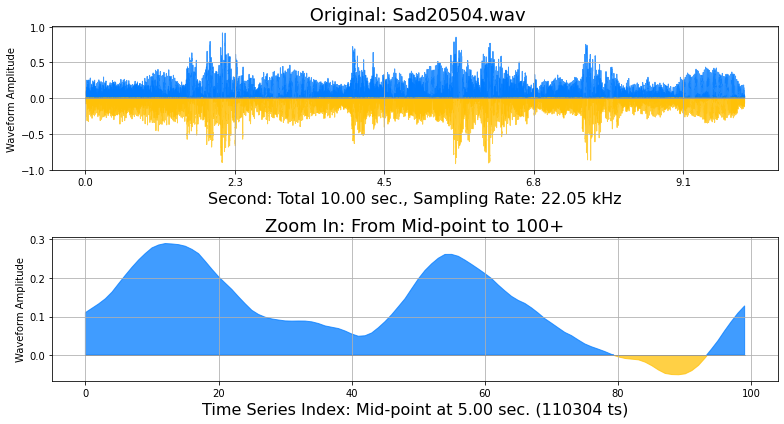

In [ ]:
pluto.draw_audio(pluto.df_music_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

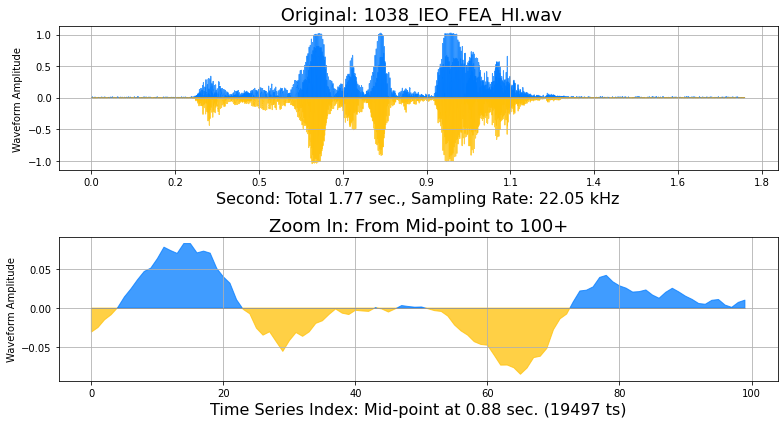

In [ ]:
pluto.draw_audio(pluto.df_voice_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

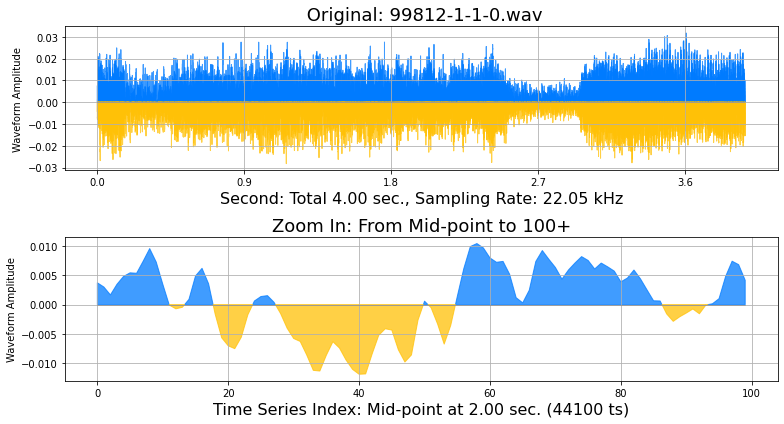

In [ ]:
pluto.draw_audio(pluto.df_sound_data)

# Audio Control D-scale 

- pitches D, E, F♯, G, A, B, and C♯

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

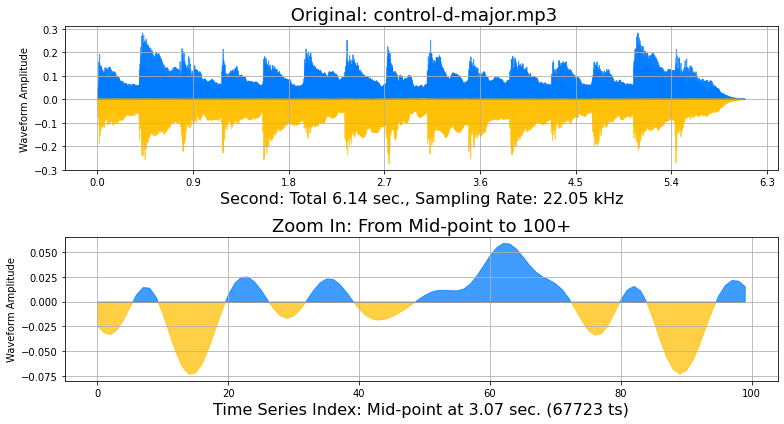

In [ ]:
# 

f = 'Data-Augmentation-with-Python/pluto_data/control-d-major.mp3'
data_amp, sam_rate, fname = pluto._fetch_audio_data(f)
pluto.audio_control_dmajor = [data_amp, sam_rate, fname, f]
pluto._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
# display audio 
display(IPython.display.Audio(data_amp, rate=sam_rate))

In [ ]:
pluto.audio_control_dmajor

[array([-1.9005806e-06,  1.0451000e-05,  9.7864549e-06, ...,
        -9.9641620e-06,  1.5720242e-04,  0.0000000e+00], dtype=float32),
 22050,
 'control-d-major.mp3',
 'Data-Augmentation-with-Python/pluto_data/control-d-major.mp3']

# Augmentation standard functions

- basic audio augmentation
  - Time shifting
  - Time stretching
  - Pitch scaling
  - Noise addition
  - Polarity Inversion
- Filters and masking
  - Filters


# Time shift

In [ ]:
# %CARRY-OVER

!pip install audiomentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %%writefile -a {pluto_chapter_7}

import audiomentations
#
@add_method(PacktDataAug)
def _fetch_1_sample(self, df, dsize=1):
  p = df.sample(dsize)
  p.reset_index(drop=True, inplace=True)
  return p.fname[0]
#
@add_method(PacktDataAug)
def _audio_transform(self, df, xtransform, title=''):
  if (type(df) is list):
    data_amp, sam_rate, fname, lname = self.audio_control_dmajor
  else:
    lname = self._fetch_1_sample(df)
    data_amp, sam_rate, fname = self._fetch_audio_data(lname)
  #
  xaug = xtransform(data_amp, sample_rate=sam_rate)
  # augmented
  self._draw_audio(xaug, sam_rate, title + ' Augmented: ' + fname)
  display(IPython.display.Audio(xaug, rate=sam_rate))
  # original
  self._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
  display(IPython.display.Audio(data_amp, rate=sam_rate))
  return

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_time_shift(self, df, min_fraction=-0.2,max_fraction=0.8,rollover=True,title='Time Shift'):
  xtransform = audiomentations.Shift(
    min_fraction = min_fraction,
    max_fraction = max_fraction,
    rollover = rollover,
    p=1.0
  )
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

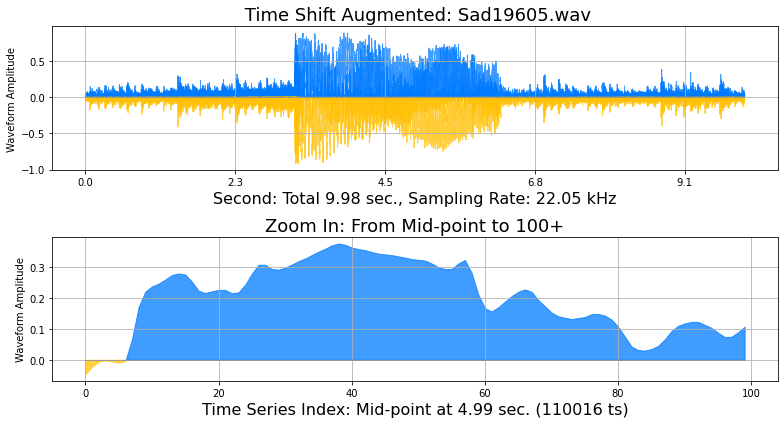

In [ ]:
pluto.play_aug_time_shift(pluto.df_music_data, min_fraction=0.5)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

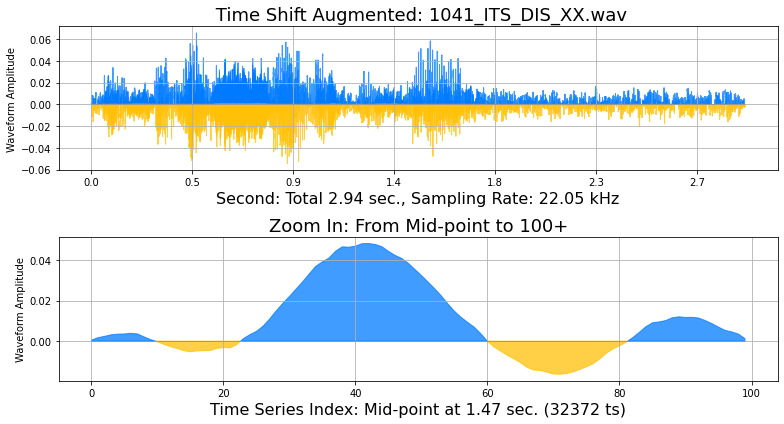

In [ ]:
pluto.play_aug_time_shift(pluto.df_voice_data, min_fraction=0.5)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

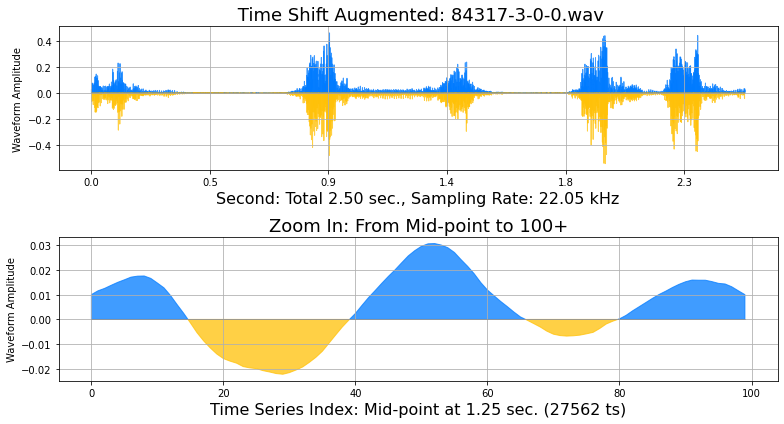

In [ ]:
pluto.play_aug_time_shift(pluto.df_sound_data, min_fraction=0.5)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

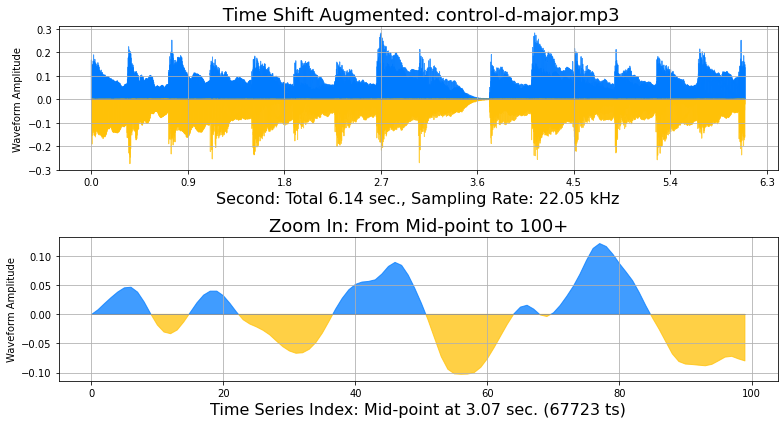

In [ ]:
pluto.play_aug_time_shift(pluto.audio_control_dmajor, min_fraction=0.2)

# Time stretch

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_time_stretch(self, df, min_rate=0.2,max_rate=6.8,leave_length_unchanged=True,title='Time Stretch'):
  xtransform = audiomentations.TimeStretch(
    min_rate = min_rate,
    max_rate = max_rate,
    leave_length_unchanged = leave_length_unchanged,
    p=1.0
  )
  self._audio_transform(df, xtransform, title=title)
  return
  # librosa.effects.time_stretch under the hood 

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

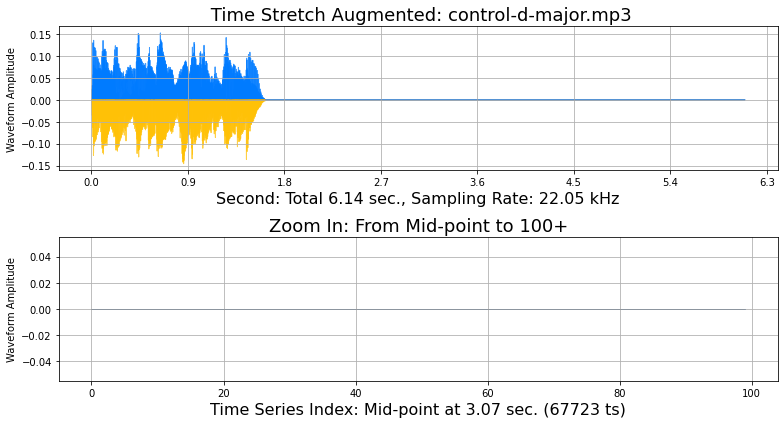

In [ ]:
pluto.play_aug_time_stretch(pluto.audio_control_dmajor, max_rate=5.4)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

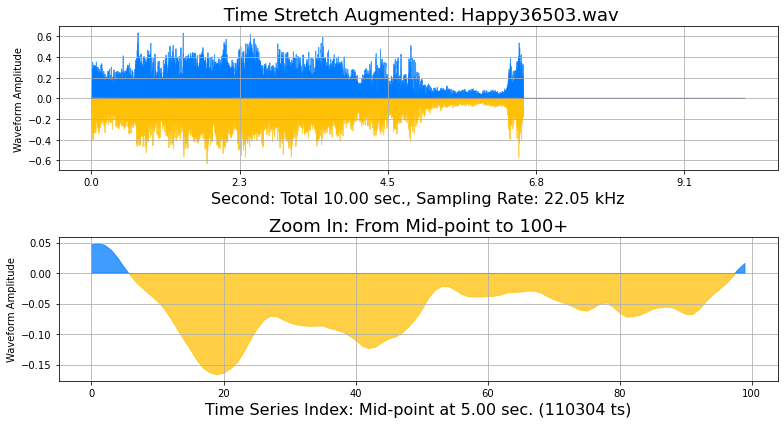

In [ ]:
pluto.play_aug_time_stretch(pluto.df_music_data, max_rate=3.0)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

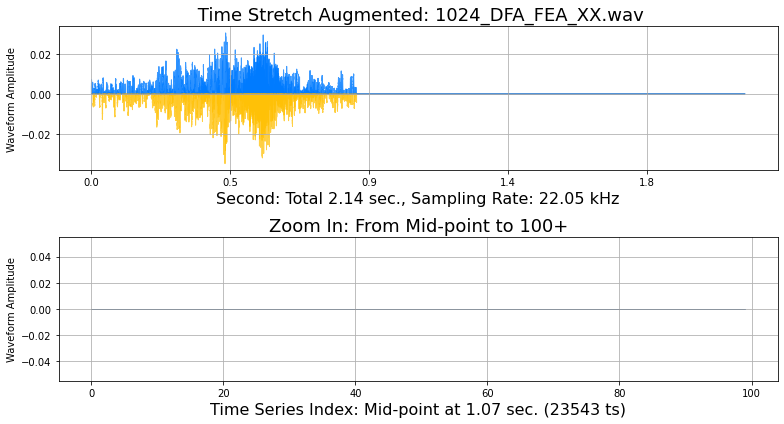

In [ ]:
pluto.play_aug_time_stretch(pluto.df_voice_data, max_rate=3.5)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

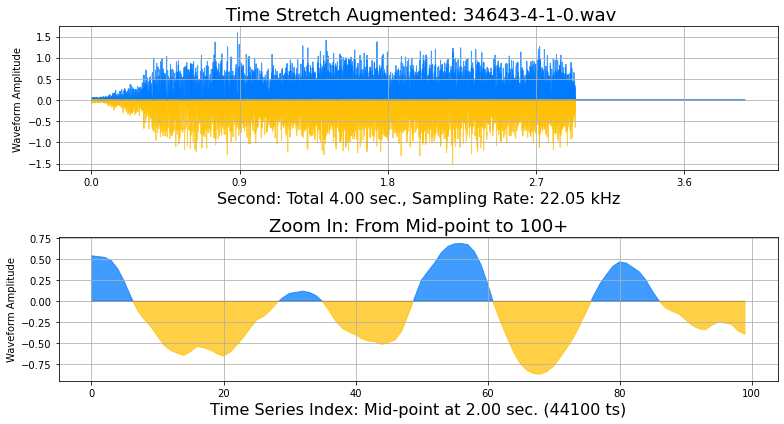

In [ ]:
pluto.play_aug_time_stretch(pluto.df_sound_data, max_rate=2.5)


In [ ]:
pluto.fname_id

12

# Pitch scaling

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_pitch_scaling(self, df, min_semitones=-6.0,max_semitones=6.0,title='Pitch Scaling'):
  xtransform = audiomentations.PitchShift(
    min_semitones = min_semitones,
    max_semitones = max_semitones,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

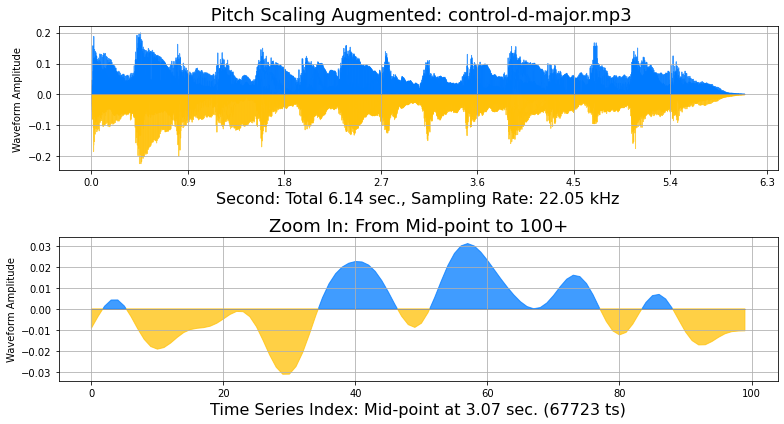

In [ ]:
pluto.play_aug_pitch_scaling(pluto.audio_control_dmajor,min_semitones=-6.0,max_semitones=6.0)

In [ ]:
pluto.fname_id

13

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

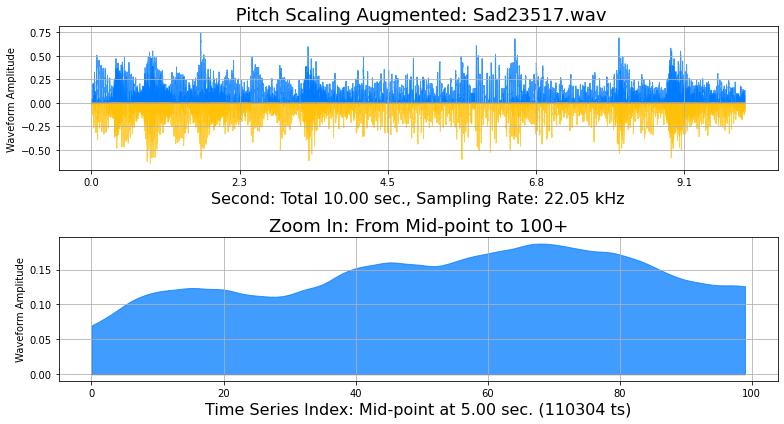

In [ ]:
pluto.play_aug_pitch_scaling(pluto.df_music_data,min_semitones=-11.0, max_semitones=-9.0)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

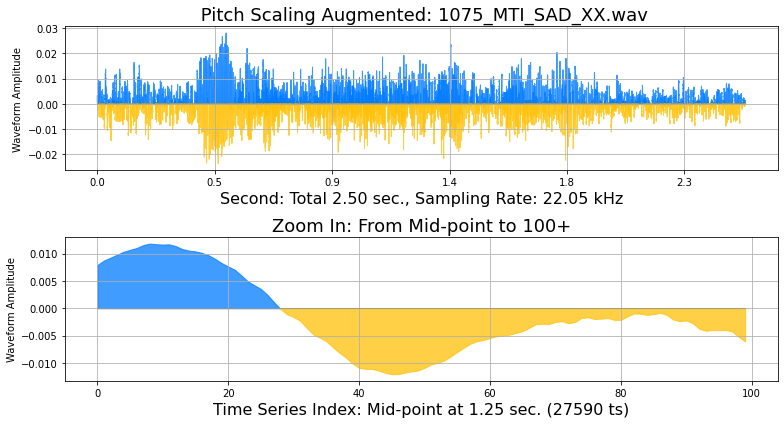

In [ ]:
pluto.play_aug_pitch_scaling(pluto.df_voice_data,min_semitones=-6.0, max_semitones=6.0)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

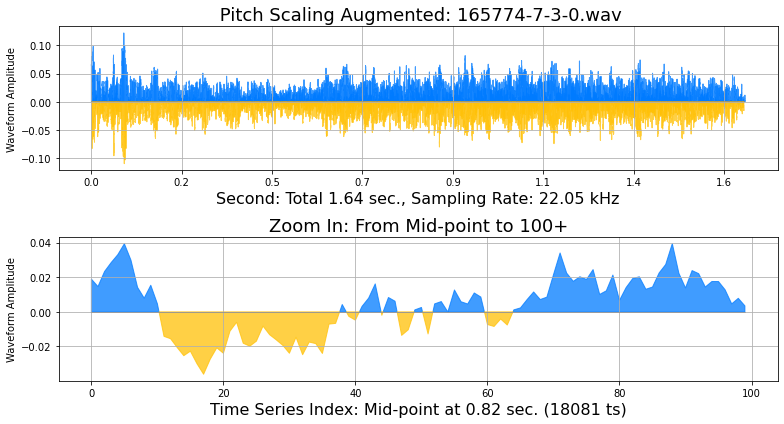

In [ ]:
pluto.play_aug_pitch_scaling(pluto.df_sound_data,min_semitones=4.0, max_semitones=11.0)

# Noise injection, add Gaussian noise

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_noise_injection(self, df, min_amplitude=0.002,max_amplitude=0.2,title='Gaussian noise injection'):
  xtransform = audiomentations.AddGaussianNoise(
    min_amplitude = min_amplitude,
    max_amplitude = max_amplitude,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

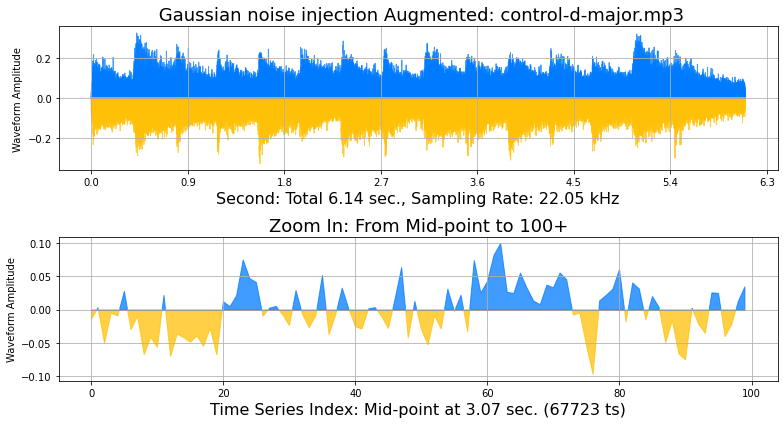

In [ ]:
pluto.play_aug_noise_injection(pluto.audio_control_dmajor, min_amplitude=0.02,max_amplitude=0.05)

In [ ]:
pluto.fname_id

17

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

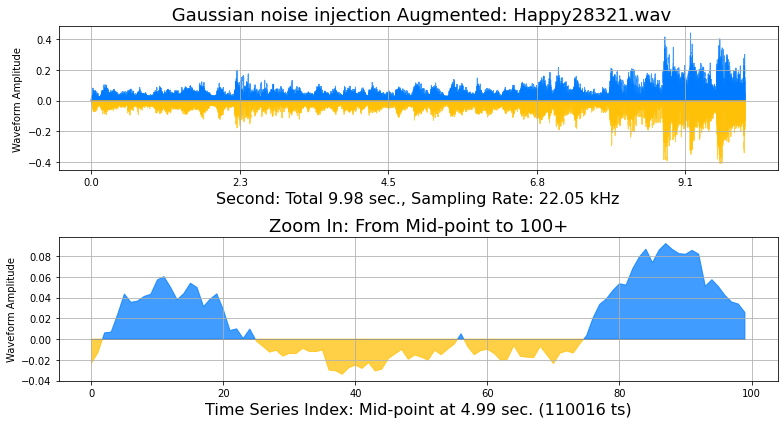

In [ ]:
pluto.play_aug_noise_injection(pluto.df_music_data, max_amplitude=0.01)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

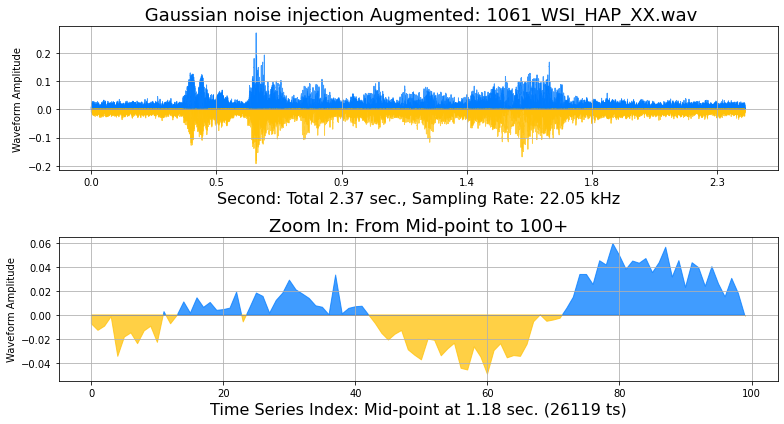

In [ ]:
pluto.play_aug_noise_injection(pluto.df_voice_data, max_amplitude=0.01)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

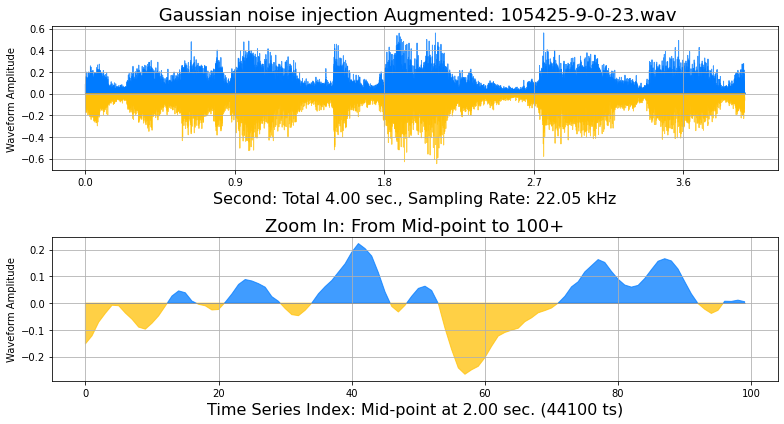

In [ ]:
pluto.play_aug_noise_injection(pluto.df_sound_data, max_amplitude=0.022)

# Polarity Inversion

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_polar_inverse(self, df, title='Polarity inversion'):
  xtransform = audiomentations.PolarityInversion(
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

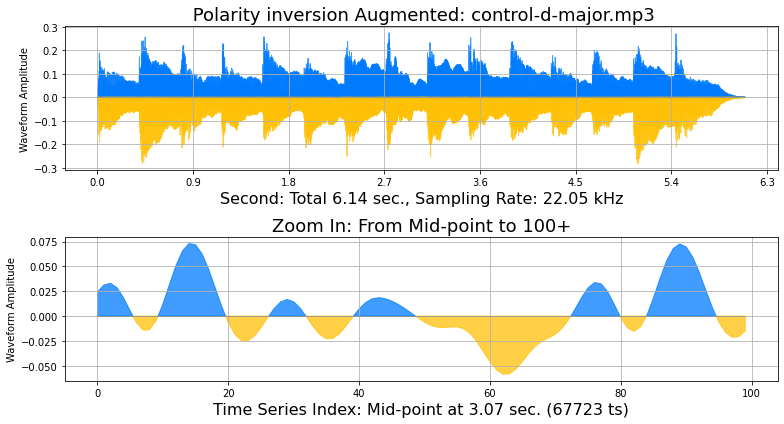

In [ ]:
pluto.play_aug_polar_inverse(pluto.audio_control_dmajor)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

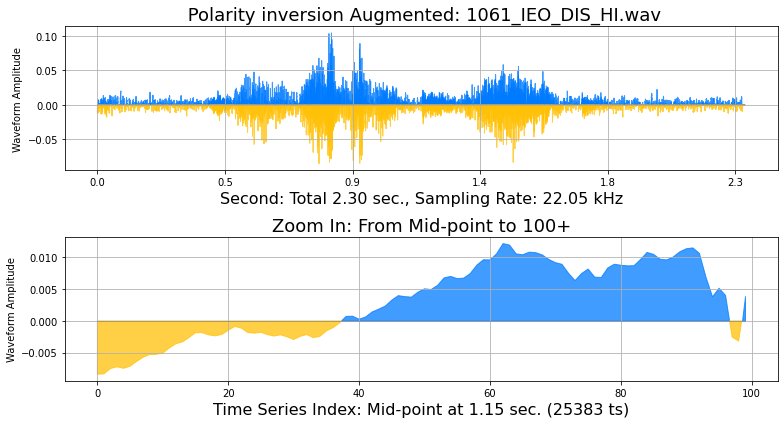

In [ ]:
pluto.play_aug_polar_inverse(pluto.df_voice_data)

# Low pass Filter

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_low_pass_filter(self, df, 
  min_cutoff_freq=150, max_cutoff_freq=7500,
  min_rolloff=12, max_rolloff=24,
  title='Low pass filter'):
  xtransform = audiomentations.LowPassFilter(
    min_cutoff_freq = min_cutoff_freq,
    max_cutoff_freq = max_cutoff_freq,
    min_rolloff = min_rolloff,
    max_rolloff = max_rolloff,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

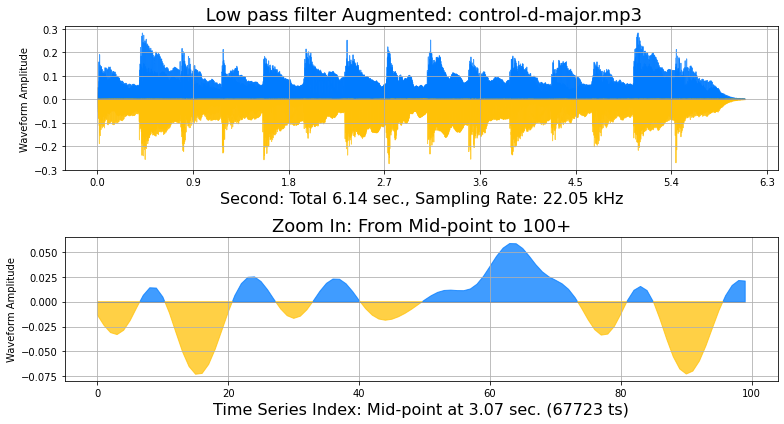

In [ ]:
pluto.play_aug_low_pass_filter(pluto.audio_control_dmajor)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

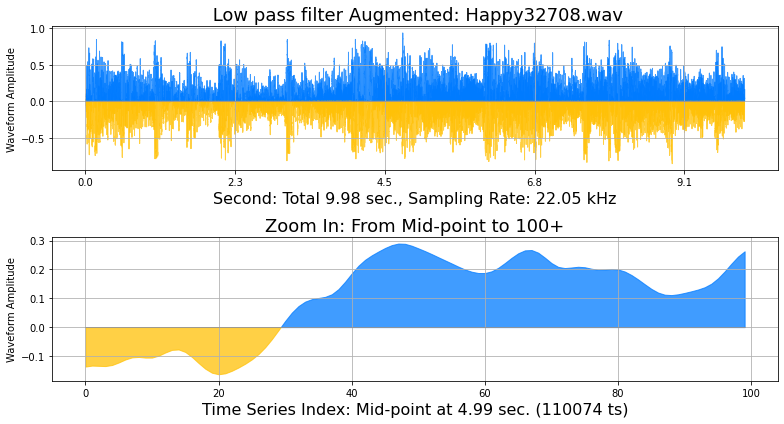

In [ ]:
pluto.play_aug_low_pass_filter(pluto.df_music_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

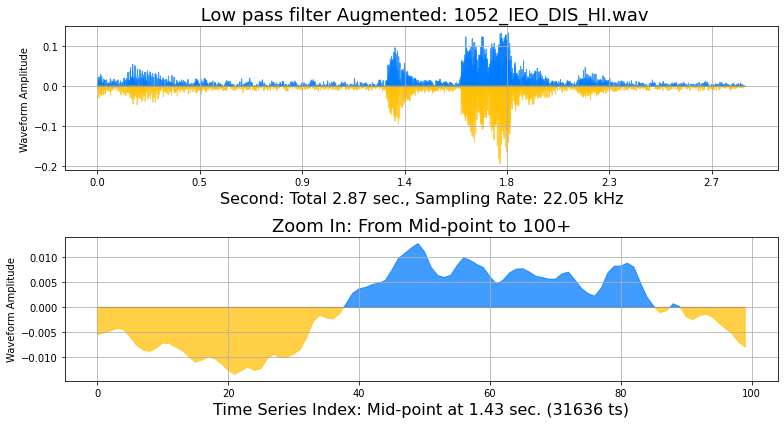

In [ ]:
pluto.play_aug_low_pass_filter(pluto.df_voice_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

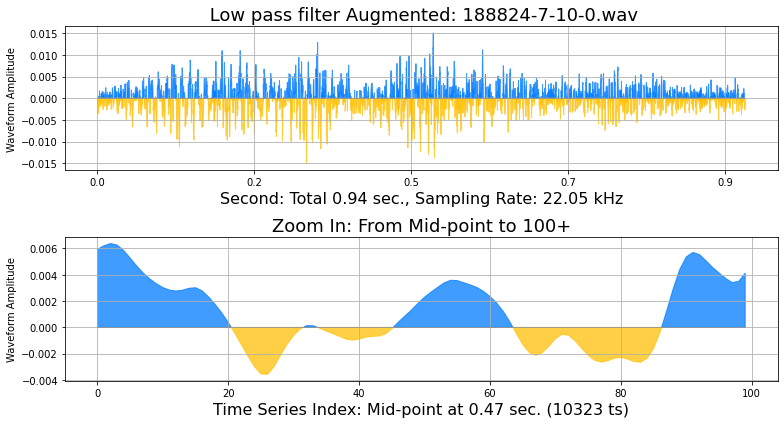

In [ ]:
pluto.play_aug_low_pass_filter(pluto.df_sound_data)

#High pass filter

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_high_pass_filter(self, df, 
  min_cutoff_freq=20, max_cutoff_freq=2400,
  min_rolloff=12, max_rolloff=24,
  title='High pass filter'):
  xtransform = audiomentations.HighPassFilter(
    min_cutoff_freq = min_cutoff_freq,
    max_cutoff_freq = max_cutoff_freq,
    min_rolloff = min_rolloff,
    max_rolloff = max_rolloff,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

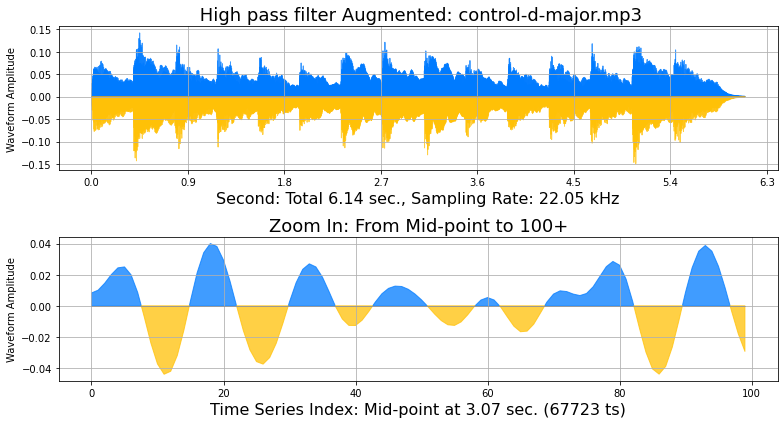

In [ ]:
pluto.play_aug_high_pass_filter(pluto.audio_control_dmajor)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

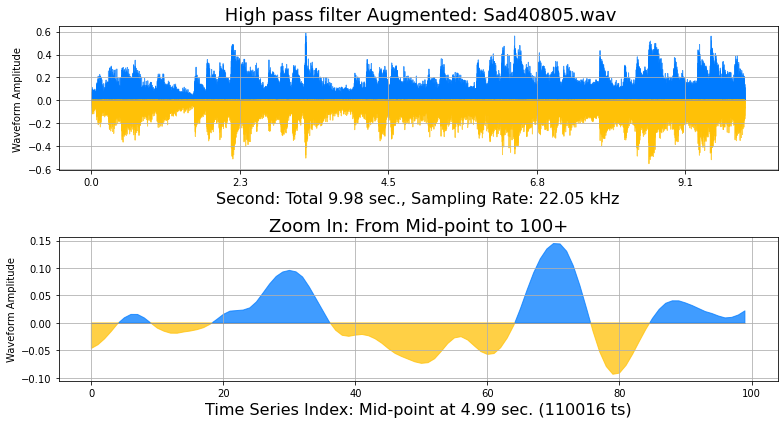

In [ ]:
pluto.play_aug_high_pass_filter(pluto.df_music_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

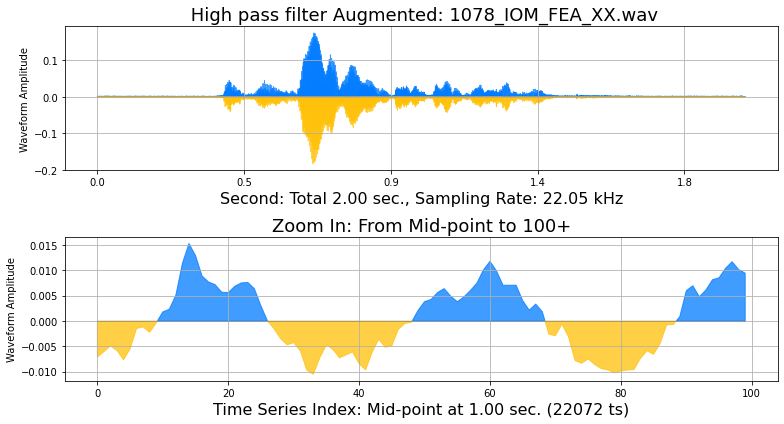

In [ ]:
pluto.play_aug_high_pass_filter(pluto.df_voice_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

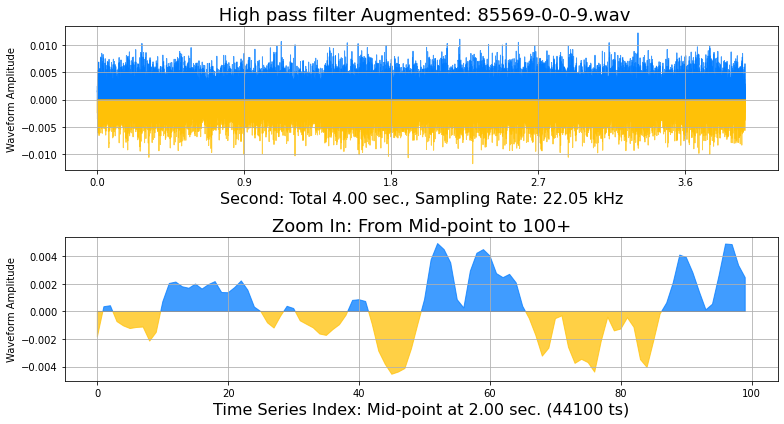

In [ ]:
pluto.play_aug_high_pass_filter(pluto.df_sound_data)

# Band pass filter

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_band_pass_filter(self, df, 
  min_center_freq=200, max_center_freq=4000,
  min_bandwidth_fraction=0.5,max_bandwidth_fraction=1.99,
  min_rolloff=12, max_rolloff=24,
  title='Band pass filter'):
  xtransform = audiomentations.BandPassFilter(
    min_center_freq = min_center_freq,
    max_center_freq = max_center_freq,
    min_bandwidth_fraction = min_bandwidth_fraction,
    max_bandwidth_fraction = max_bandwidth_fraction,
    min_rolloff = min_rolloff,
    max_rolloff = max_rolloff,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

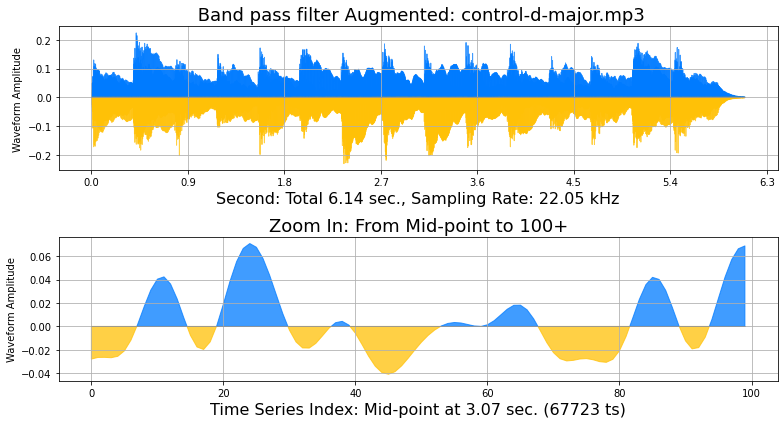

In [ ]:
pluto.play_aug_band_pass_filter(pluto.audio_control_dmajor)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

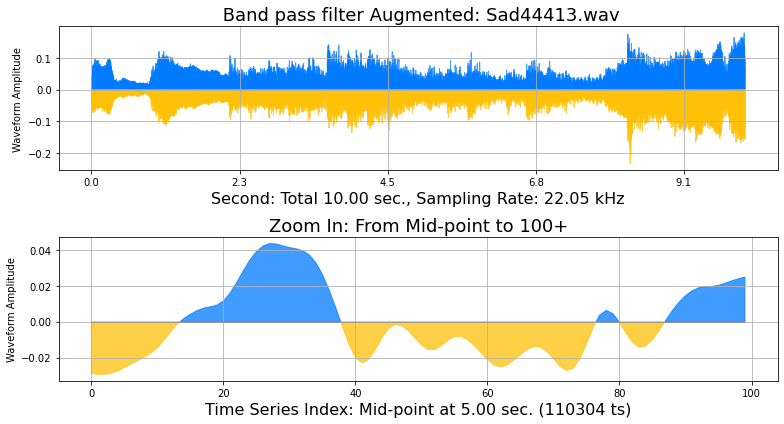

In [ ]:
pluto.play_aug_band_pass_filter(pluto.df_music_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

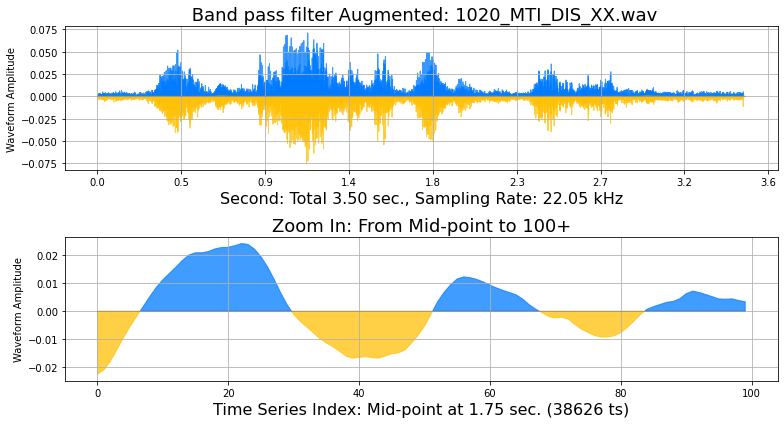

In [ ]:
pluto.play_aug_band_pass_filter(pluto.df_voice_data)

<ipython-input-24-2fa54a4ab2d8>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

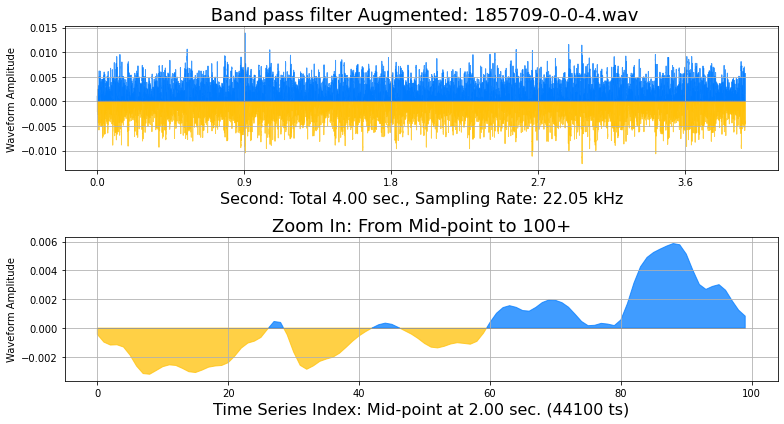

In [ ]:
pluto.play_aug_band_pass_filter(pluto.df_sound_data)

# Sneak peek (Optional)

In [ ]:
pluto.text_marry_lamb = 'Mary had a little lamb, whose fleece was white as snow. And everywhere that Mary went, the lamb was sure to go.'

In [ ]:
x = numpy.array([ord(c) for c in pluto.text_marry_lamb])

In [ ]:
k = pandas.DataFrame(x, columns=['tdata'])
k.head()

,tdata
0,77
1,97
2,114
3,121
4,32


TypeError: ignored

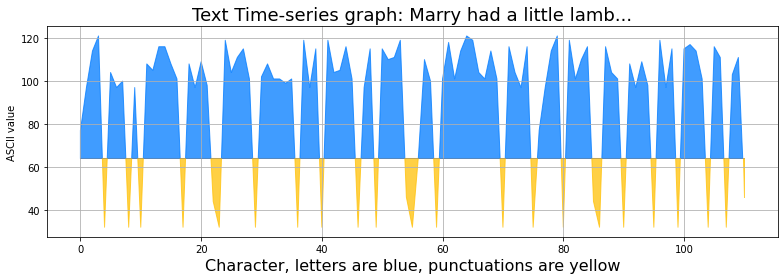

In [ ]:
canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(11, 4))
# pics = pic.flatten()
pluto._draw_area_with_neg(x,pic,izero=64)
pic.set_title('Text Time-series graph: Marry had a little lamb...', fontsize=18.)
pic.set_xlabel('Character, letters are blue, punctuations are yellow', fontsize=16.)
pic.set_ylabel('ASCII value')
pic.grid()
# 
# display and save image
canvas.tight_layout()
pluto._drop_image(canvas)
canvas.show()

In [ ]:
print('End of chapter 7')

End of chapter 7


# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

In [ ]:
# %%script false --no-raise-error  #temporary stop execute for export file

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm